## Домашнее задание  № 1 - анализ успеваемости студентов

### Задача
В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе. \
Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента.\
 На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

 ### Вам необходимо:
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

### Описание данных
Для выполнения задания вам необходимы файлы train.csv, лекции.csv, вопросы.csv.

#### train.csv
- `row_id`: (int64) Идентификационный код строки.
- `timestamp`: (int64) время в миллисекундах между этим взаимодействием пользователя и завершением первого события от этого пользователя.
- `user_id`: (int32) Идентификационный код пользователя.
- `content_id`: (int16) Идентификационный код взаимодействия с пользователем
- `content_type_id`: (int8) 0, если событием был заданный пользователю вопрос, 1, если событием был просмотр лекции пользователем.
- `task_container_id`: (int16) Идентификационный код пакета вопросов или лекций. Например, пользователь может просмотреть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три параметра будут иметь общий - идентификатор task_container_id.
- `user_answer`: (int8) ответ пользователя на вопрос, если таковой имеется. Считайте -1 как null, для лекций.
- `answered_correctly`: (int8), если пользователь ответил правильно. Считайте -1 как null, для лекций.
- `prior_question_elapsed_time`: (float32) Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос из предыдущего набора вопросов, игнорируя все лекции между ними. Значение null для первого набора вопросов или лекции пользователя. Обратите внимание, что это среднее время, затраченное пользователем на решение каждого вопроса из предыдущего пакета.
- `prior_question_had_explanation`: (bool) Независимо от того, видел ли пользователь объяснение и правильные ответы после ответа на предыдущий набор вопросов, игнорируя любые лекции между ними. Это значение используется в одном наборе вопросов и равно нулю для первого набора вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью вступительного диагностического теста, на который он не получил никакой обратной связи.

### questions.csv: метаданные для вопросов, задаваемых пользователям.
- `question_id`: внешний ключ для столбца train/test content_id, если тип контента - question (0).
- `bundle_id`: код, для которого вопросы подаются вместе.
- `correct_answer`: ответ на вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав.
- `part`: соответствующий раздел теста TOEIC.
- `tags`: один или несколько подробных кодов тегов для вопроса. Значение тегов приведено не будет, но этих кодов достаточно для объединения вопросов в группы.

### lectures.csv: метаданные для лекций, которые просматривают пользователи по мере их продвижения в обучении.
- `lecture_id`: внешний ключ для столбца train/test content_id, если тип контента - lecture (1).
- `part`: код категории верхнего уровня для лекции.
- `tag`: один из тегов, обозначающих лекцию. Значение тегов не будет указано, но этих кодов достаточно для объединения лекций в группы.
- `type_of`: краткое описание основной цели лекции.
  *переведено с помощью google


In [5]:
import sys

In [6]:
print (sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [7]:
import pandas as pd #для работы с табличными данными
import os #для работы с файловой системой компьютера
import numpy as np  #для работы с массивами
import scipy.stats as st #ститистические расчеты, гистограмы
import matplotlib.pyplot as plt #для создания графиков
import seaborn as sns #для визуализации


In [8]:
lectures = pd.read_csv('D:\Загрузки\\lectures.csv', sep=',') # считываем данные, указываем, что данные в файле разделены запятыми
questions_data = pd.read_csv('D:\Загрузки\\questions.csv', sep=',')
train = pd.read_csv('D:\Загрузки\\train-001.csv', sep=',')

In [9]:
# анализ данных 
    # Вывод информации о датасете
print("Информация о датасете:")
train.info() # даст общую информацию о данных 

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [10]:
print("Первые несколько строк датасета:")# Вывод первых нескольких строк данных в виде Dataframe
display(train.head())

Первые несколько строк датасета:


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [11]:
print('Описательная статистика:') # Кол-во значений, среднее, стандартное отклонение, мин\макс. значения, квартили
display(train.describe())

Описательная статистика:


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


гистограмма численных показателей


array([[<Axes: title={'center': 'row_id'}>,
        <Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'user_id'}>],
       [<Axes: title={'center': 'content_id'}>,
        <Axes: title={'center': 'content_type_id'}>,
        <Axes: title={'center': 'task_container_id'}>],
       [<Axes: title={'center': 'user_answer'}>,
        <Axes: title={'center': 'answered_correctly'}>,
        <Axes: title={'center': 'prior_question_elapsed_time'}>]],
      dtype=object)

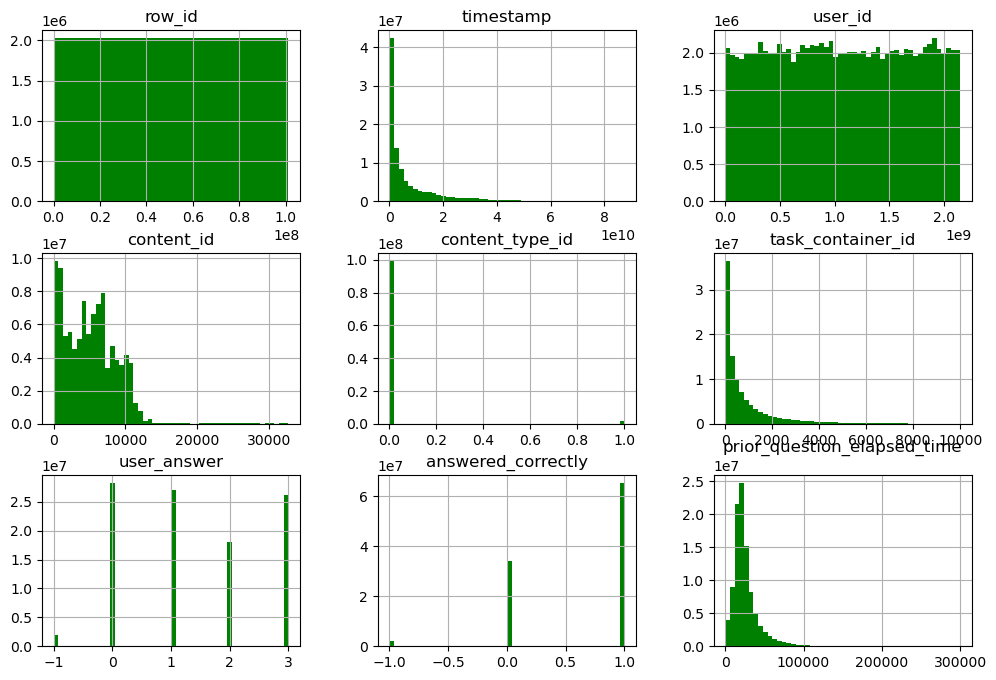

In [12]:
print('гистограмма численных показателей')# строим гистограмы для всех столбцов.
train.hist(figsize=(12, 8), bins=50, color='green')

In [13]:
print("Проверка на наличие: NaN и None")
print(train.isnull().sum())  # Проверяем на NaN и None
    
# Разделительная строка
print("\n" + "*"*80 + "\n")
    
print("Проверка на наличие пустых строк")
print((train == '').sum())   # Проверяем на пустые строки
    
# Разделительная строка
print("\n" + "*"*80 + "\n")
    
print("Проверка на наличие: нулевых значений")
print((train == 0).sum())    # Проверяем на нулевые значения

Проверка на наличие: NaN и None
row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

********************************************************************************

Проверка на наличие пустых строк
row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
dtype: int64

*********************************************

Как мы видим, для самых интересующих строк - row_id, timestamp, user_id, content_id, content_type_id, task_container_id, user_answer, answered_correctly отсутствуют пропущенные значения, значения все целочисленные. Столбцы prior_question_elapsed_time  и prior_question_had_explanation имеют значительное количество пропущенных значений, скорее всего это связано с особенностями сбора данных. При том, что хорошо - пустые строки отсутствуют, однако присутствуют нулевые значения. По некоторым характеристикам присутствует нормальное распределение.

In [15]:
print(f'Количесвто уникальных пользоветелей: {train['user_id'].nunique()}') # узнаем сколько у нас уникальных пользователей
print(f'Количество уникального контента:{train['content_id'].nunique()}') # узнаем кол-во уникального контента с пользователем 
print(f'Варианты ответов пользоветелей: {train['user_answer'].unique()}')
print(f'Варианты оценок ответов пользоветелей: {train['answered_correctly'].unique()}')
    

Количесвто уникальных пользоветелей: 393656
Количество уникального контента:13782
Варианты ответов пользоветелей: [ 3  2  0  1 -1]
Варианты оценок ответов пользоветелей: [ 1  0 -1]


In [16]:
# Проанилизилуем количество правильных и неправильных ответов на вопросы
# Выбираем из DataFrame только строки, где тип контента - вопрос (0)
questions = train[train['content_type_id'] == 0]

# Подсчитываем, сколько раз встречаются правильные и неправильные ответы на вопросы 
answer_counts = questions['answered_correctly'].value_counts()

# Выводим результат на экран
print(answer_counts)
# Доля правильных ответов
total_questions = len(questions)
correct_answers = answer_counts[1]
percentage_correct = correct_answers / total_questions * 100
print(f"Процент правильных ответов: {percentage_correct:.2f}%")

answered_correctly
1    65244627
0    34026673
Name: count, dtype: int64
Процент правильных ответов: 65.72%


In [17]:
# Проанализируем роль лекций: среднее количество просмотренных лекций на пользователя
# Выбираем из DataFrame только строки, где тип контента -лекция (1)
lecture_count_per_user = train[train['content_type_id'] == 1].groupby('user_id').size().mean()
print(f'\nСреднее количество просмотренных лекций на пользователя: {lecture_count_per_user:.2f}')


Среднее количество просмотренных лекций на пользователя: 13.09


Количество студентов, посмотревших более 5 лекций: 64619

********************************************************************************



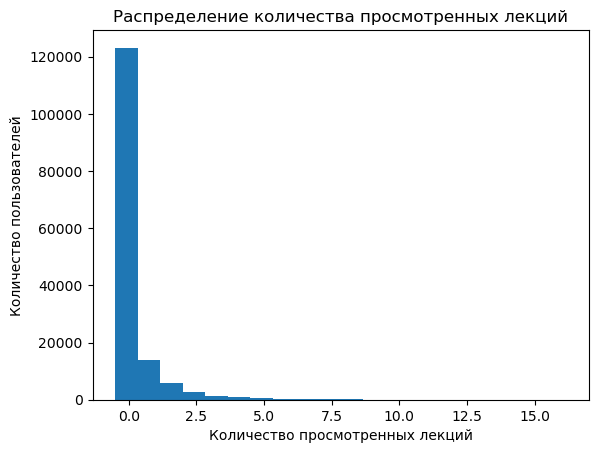

In [18]:
#Проанализируем как студенты смотрят лекции
# Фильтруем пользователей, посмотревших более 5 лекций
lecture_counts =train[train['content_type_id'] == 1].groupby('user_id').size() 

users_with_more_than_5_lectures=lecture_counts[lecture_counts > 5]
# Считаем количество таких пользователей
num_users_with_more_than_5_lectures = len(users_with_more_than_5_lectures)
print(f"Количество студентов, посмотревших более 5 лекций: {num_users_with_more_than_5_lectures}")

# Разделительная строка
print("\n" + "*"*80 + "\n")

#стандартизуем наши полученные данные для более кочественного отображения.
# Стандартизация
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_lecture_counts = scaler.fit_transform(lecture_counts.values.reshape(-1, 1))# Преобразуем данные в формат, подходящий для нормализации
# Построение гистограммы
plt.hist(scaled_lecture_counts, bins=20)
plt.xlabel('Количество просмотренных лекций')
plt.ylabel('Количество пользователей')
plt.title('Распределение количества просмотренных лекций')
plt.show()

Вывод: по каким-то причинам лекции не пользуются популярностью

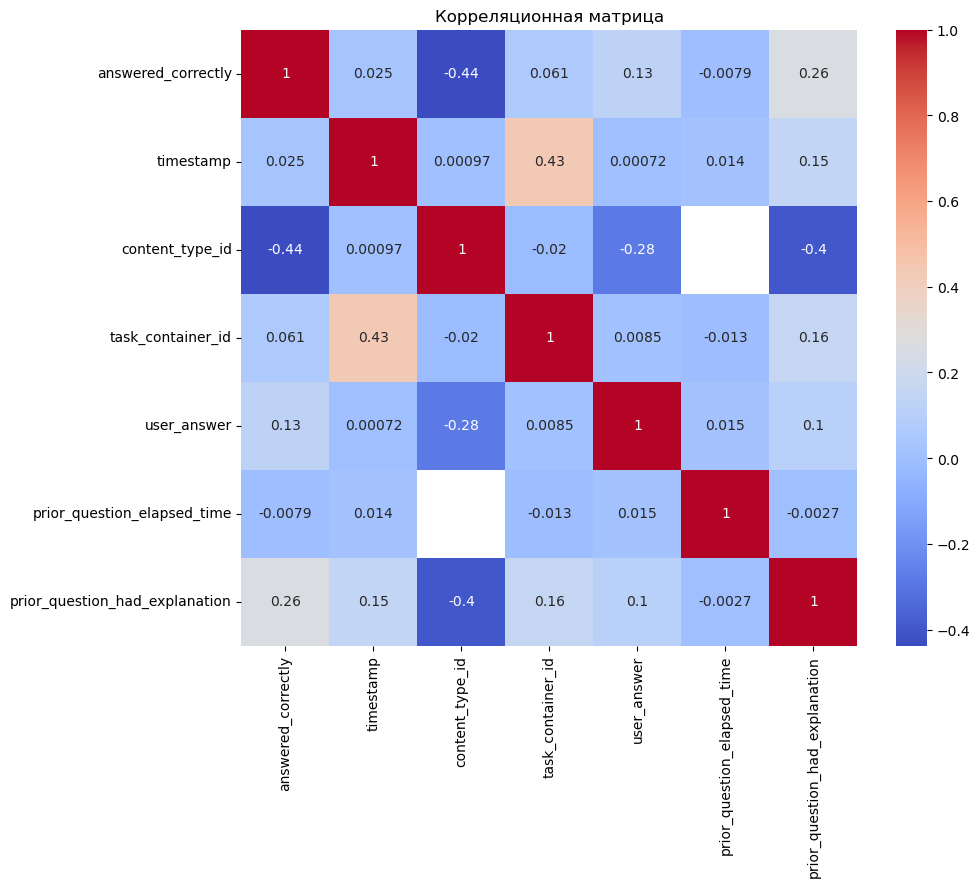

In [20]:
corr_matrix_tr = train.drop(['row_id', 'user_id', 'content_id'], axis=1).corr()

corr_matrix_tr = corr_matrix_tr.reindex(columns=['answered_correctly'] + [col for col in corr_matrix_tr.columns if col != 'answered_correctly'])
corr_matrix_tr = corr_matrix_tr.reindex(index=['answered_correctly'] + [col for col in corr_matrix_tr.index if col != 'answered_correctly'])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tr, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

Выше мы видим, что корректность ответов  зависит в первую очередь от собственно был ли это вопрос или лекция. Факторы, которые оказывают влияние на успешность - объяснения к вопросам, также тип задания, возможно временной фактор.

In [22]:
# анализ данных lectures
    # Вывод информации о датасете
print("Информация о датасете:")
lectures.info() # даст общую информацию о данных 

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [23]:
print("Первые несколько строк датасета:")# Вывод первых нескольких строк данных в виде Dataframe
display(lectures.head())

Первые несколько строк датасета:


,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [24]:
print('Описательная статистика:') # Кол-во значений, среднее, стандартное отклонение, мин\макс. значения, квартили
display(lectures.describe())

Описательная статистика:


,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


гистограмма численных показателей


array([[<Axes: title={'center': 'lecture_id'}>,
        <Axes: title={'center': 'tag'}>],
       [<Axes: title={'center': 'part'}>, <Axes: >]], dtype=object)

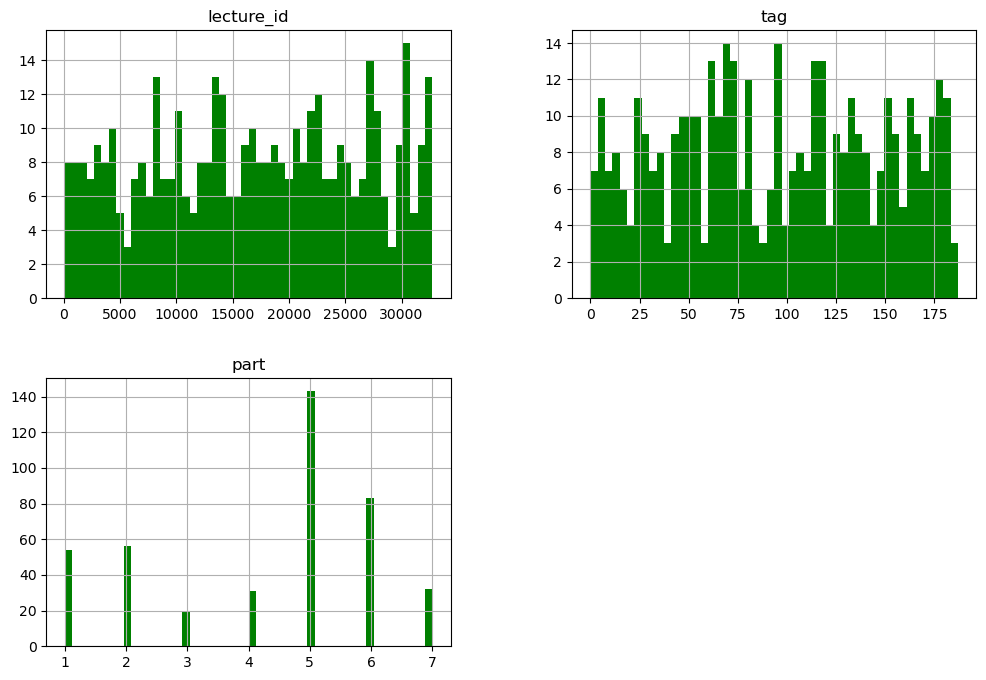

In [25]:
print('гистограмма численных показателей')# строим гистограмы для всех столбцов.
lectures.hist(figsize=(12, 8), bins=50, color='green')

In [26]:
  
print("Проверка на наличие: NaN и None")
print(lectures.isnull().sum())  # Проверяем на NaN и None
    
# Разделительная строка
print("\n" + "*"*80 + "\n")
    
print("Проверка на наличие пустых строк")
print((lectures == '').sum())   # Проверяем на пустые строки
    
# Разделительная строка
print("\n" + "*"*80 + "\n")
    
print("Проверка на наличие: нулевых значений")
print((lectures == 0).sum())    # Проверяем на нулевые значения

Проверка на наличие: NaN и None
lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

********************************************************************************

Проверка на наличие пустых строк
lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

********************************************************************************

Проверка на наличие: нулевых значений
lecture_id    0
tag           2
part          0
type_of       0
dtype: int64


Уникальные типы лекций: ['concept' 'solving question' 'intention' 'starter']
Распределение типов лекций:
 type_of
concept             222
solving question    186
intention             7
starter               3
Name: count, dtype: int64


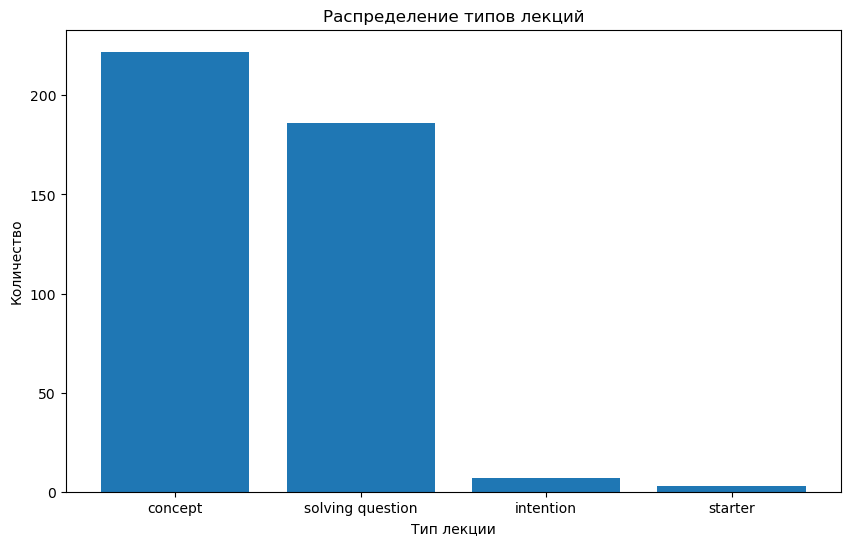

In [27]:
# Уникальные значения в столбце type_of
unique_types = lectures['type_of'].unique()
print("Уникальные типы лекций:", unique_types)

# Распределение значений в столбце type_of
type_counts = lectures['type_of'].value_counts()
print("Распределение типов лекций:\n", type_counts)

# Визуализация распределения
plt.figure(figsize=(10, 6))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Тип лекции')
plt.ylabel('Количество')
plt.title('Распределение типов лекций')
plt.show()

Как мы видим боьлше всего лекций в 5 и 6 частях обучения. Практически все лекции - это concept и 
solving question6

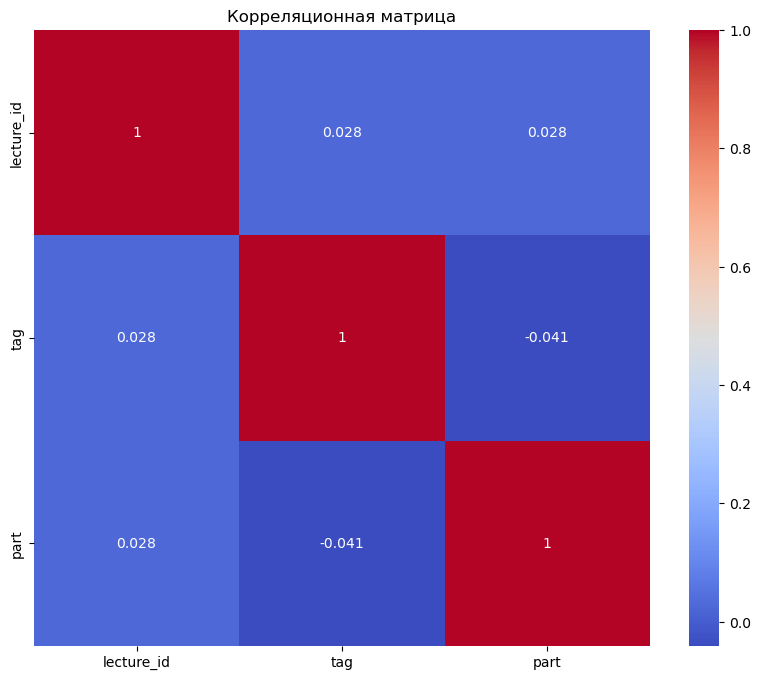

In [29]:
corr_matrix_l = lectures.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_l, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

вывод - данные никак между собой не коррелируют

In [31]:
# анализ данных questions
    # Вывод информации о датасете
print("Информация о датасете:")
questions_data.info() # даст общую информацию о данных 

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [32]:
print("Первые несколько строк датасета:")# Вывод первых нескольких строк данных в виде Dataframe
display(questions_data.head())

Первые несколько строк датасета:


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [33]:
print('Описательная статистика:') # Кол-во значений, среднее, стандартное отклонение, мин\макс. значения, квартили
display(questions_data.describe())

Описательная статистика:


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


гистограмма численных показателей


array([[<Axes: title={'center': 'question_id'}>,
        <Axes: title={'center': 'bundle_id'}>],
       [<Axes: title={'center': 'correct_answer'}>,
        <Axes: title={'center': 'part'}>]], dtype=object)

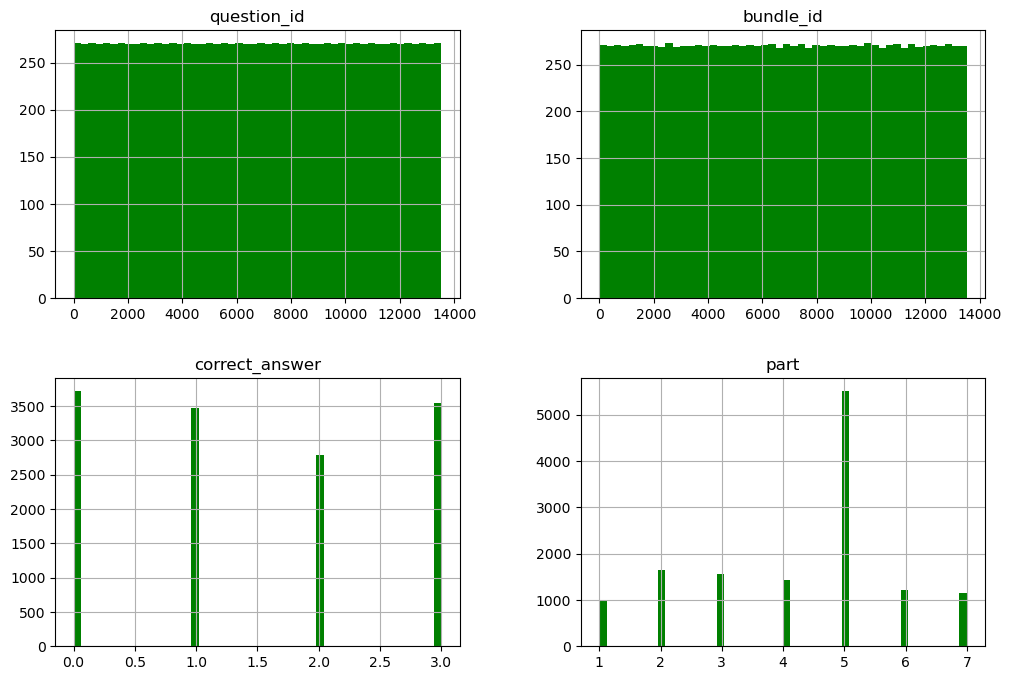

In [34]:
print('гистограмма численных показателей')# строим гистограмы для всех столбцов.
questions_data.hist(figsize=(12, 8), bins=50, color='green')

In [35]:
    
print("Проверка на наличие: NaN и None")
print(questions_data.isnull().sum())  # Проверяем на NaN и None
    
# Разделительная строка
print("\n" + "*"*80 + "\n")
    
print("Проверка на наличие пустых строк")
print((questions_data == '').sum())   # Проверяем на пустые строки
    
# Разделительная строка
print("\n" + "*"*80 + "\n")
    
print("Проверка на наличие: нулевых значений")
print((questions_data == 0).sum())    # Проверяем на нулевые значения

Проверка на наличие: NaN и None
question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

********************************************************************************

Проверка на наличие пустых строк
question_id       0
bundle_id         0
correct_answer    0
part              0
tags              0
dtype: int64

********************************************************************************

Проверка на наличие: нулевых значений
question_id          1
bundle_id            1
correct_answer    3716
part                 0
tags                 0
dtype: int64


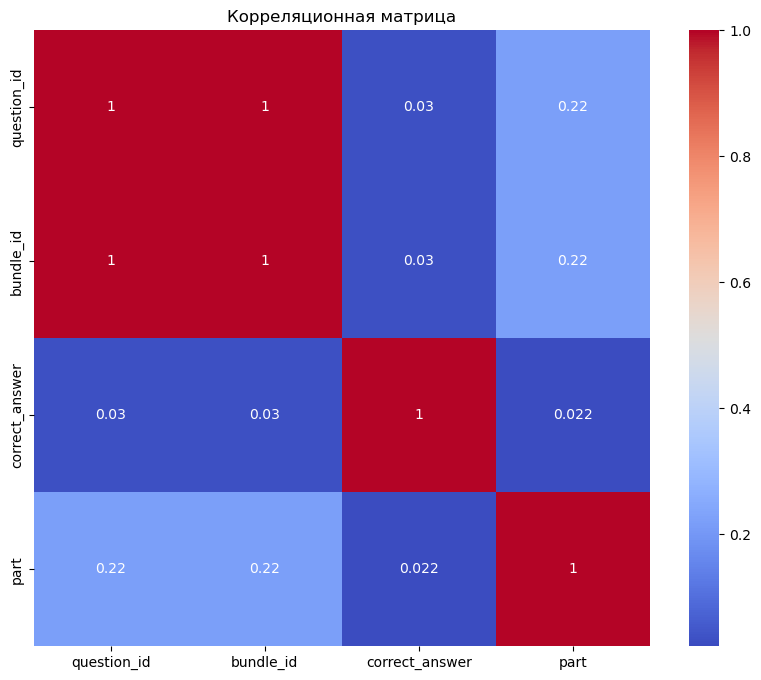

In [36]:
corr_matrix_l = questions_data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_l, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

По данным выше мы видим, что рассмотренных вопросов было 13тыс, кроме этого в таблице с вариантами ответов и указанием на то, какие правильные данных нет.
Слабая корреляция между correct_answer и другими переменными: Это может указывать на то, что сложность вопроса не сильно зависит от его принадлежности к определенному набору или части теста. Однако, это не означает, что между этими переменными нет никакой связи. Возможно, существует нелинейная зависимость или влияние других факторов, которые не были учтены.